## DB경제공모전 데이터 분석 Python Version
- 팀 : 계량해보자
- 팀원 : 김겨레 심우석
- 주제 : 기업 규모에 따른 차등정책과 중소기업 성장성

### Import package and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
kfs_total_2009_2019 = pd.read_excel("./KFS_merge_data/KFS_panel_with_threeyearsales.xlsx")

In [3]:
kfs_did_data_2010 = pd.read_excel("./KFS_merge_data/KFS_2010_2020.xlsx")

In [4]:
kfs_panel_data_2010 = pd.read_excel("./KFS_merge_data/KFS_Panel_2010_2020.xlsx")

### Firm Distribution

In [3]:
kfs_total_2009_2019.columns

Index(['패널키', '기준연도', '산업분류_대tm2', '산업분류_중tm2', '자본금중외국자본비율tm2', '주식시장상장형태tm2',
       '상시근로자수tm2', '종사자수_상용_합tm2', '종사자수_임시및일용근로자_합tm2', '유형자산당기취득액tm2',
       ...
       '자본총계tp1', '매출액tp1', '영업외비용tp1', '법인세차감전순이익tp1', '감가상각비tp1', '세금과공과tp1',
       '광고선전비tp1', '대손상각비tp1', '이자비용tp1', '3년평균매출액기준tp1'],
      dtype='object', length=139)

In [4]:
before_2014_thresh = kfs_total_2009_2019.loc[(kfs_total_2009_2019['기준연도'] <= 2014)& (kfs_total_2009_2019['산업분류_대t'] == "제조업(10~33)") & (kfs_total_2009_2019['자산t'] < 500000) & (kfs_total_2009_2019['자본총계t'] < 100000) & (kfs_total_2009_2019['상시근로자수t'] < 1000) & ((kfs_total_2009_2019['상시근로자수t'] < 300)|(kfs_total_2009_2019['자본금t'] < 8000)), :]

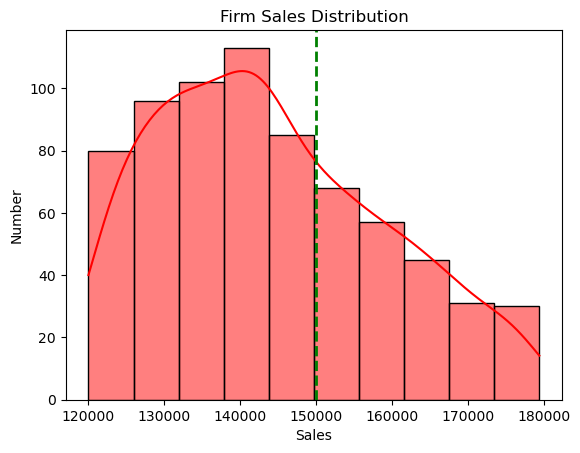

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sales_data = before_2014_thresh.loc[
    ((before_2014_thresh['매출액tp1'] >= 120000) & (before_2014_thresh['매출액tp1'] < 180000)) &
    ((before_2014_thresh['3년평균매출액기준tp1'] >= 120000) & (before_2014_thresh['3년평균매출액기준tp1'] < 150000)),
    '매출액tp1'
]

sns.histplot(sales_data, bins=10, kde=True, color='red')
plt.axvline(x=150000, color='green', linestyle='--', linewidth=2)

plt.title('Firm Sales Distribution')
plt.ylabel('Number')
plt.xlabel('Sales')
plt.show()

In [528]:
capital_thresh = kfs_total_2009_2019.loc[((kfs_total_2009_2019['자본금t'] >= 8000) & (kfs_total_2009_2019['기준연도'] <= 2014) & (kfs_total_2009_2019['산업분류_대t'] == "제조업(10~33)")), :]

findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font f

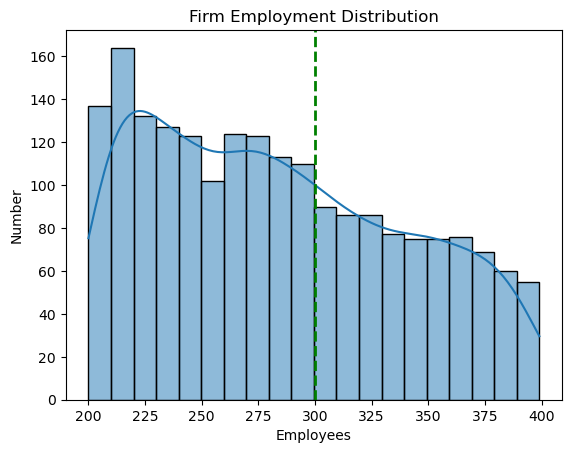

In [529]:
sns.histplot(capital_thresh.loc[((capital_thresh['상시근로자수t'] < 400) & (capital_thresh['상시근로자수t'] >= 200)),:].loc[:,"상시근로자수t"], bins=20, kde=True)
plt.axvline(x=300, color='green', linestyle='--', linewidth=2)

plt.title('Firm Employment Distribution')
plt.ylabel('Number')
plt.xlabel('Employees')
plt.show()

In [530]:
capital_thresh_2 = kfs_total_2009_2019.loc[((kfs_total_2009_2019['자본금t'] >= 8000) & (kfs_total_2009_2019['기준연도'] > 2014) & (kfs_total_2009_2019['산업분류_대t'] == "제조업(10~33)")), :]

findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font f

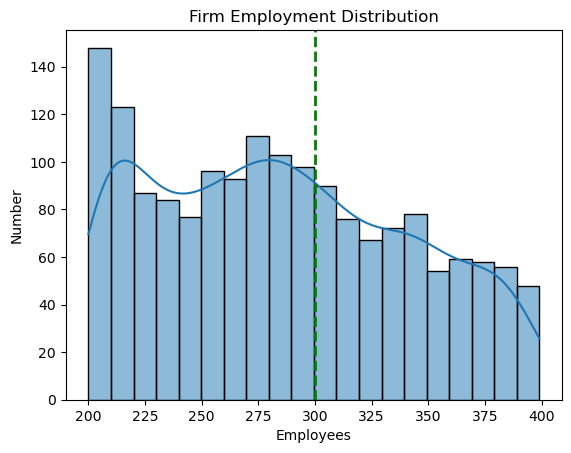

In [531]:
sns.histplot(capital_thresh_2.loc[((capital_thresh_2['상시근로자수t'] < 400) & (capital_thresh_2['상시근로자수t'] >= 200)),:].loc[:,"상시근로자수t"], bins=20, kde=True)
plt.axvline(x=300, color='green', linestyle='--', linewidth=2)

plt.title('Firm Employment Distribution')
plt.ylabel('Number')
plt.xlabel('Employees')
plt.show()

In [457]:
asset_thresh = kfs_total_2009_2019.loc[(((kfs_total_2009_2019['산업분류_중t'] == "식료품제조업") | (kfs_total_2009_2019['산업분류_중t'] == "섬유제품제조업;의복제외") | (kfs_total_2009_2019['산업분류_중t'] == "펄프,종이및종이제품제조업") | (kfs_total_2009_2019['산업분류_중t'] == "목재및나무제품제조업;가구제외") | (kfs_total_2009_2019['산업분류_중t'] == "코크스,연탄및석유정제품제조업") | (kfs_total_2009_2019['산업분류_중t'] == "화학물질및화학제품제조업;의약품제외") | (kfs_total_2009_2019['산업분류_중t'] == "고무제품및플라스틱제품제조업") | (kfs_total_2009_2019['산업분류_중t'] == "금속가공제품제조업;기계및가구제외") | (kfs_total_2009_2019['산업분류_중t'] == "전자부품,컴퓨터,영상,음향및통신장비제조업") | (kfs_total_2009_2019['산업분류_중t'] == "기타기계및장비제조업") | (kfs_total_2009_2019['산업분류_중t'] == "자동차및트레일러제조업") | (kfs_total_2009_2019['산업분류_중t'] == "기타운송장비제조업") | (kfs_total_2009_2019['산업분류_중t'] == "전기,가스,증기및공기조절공급업") | (kfs_total_2009_2019['산업분류_중t'] == "종합건설업") | (kfs_total_2009_2019['산업분류_중t'] == "도매및상품중개업")) & (kfs_total_2009_2019['자산t'] < 500000) & (kfs_total_2009_2019['기준연도'] >= 2015)), :]

findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font f

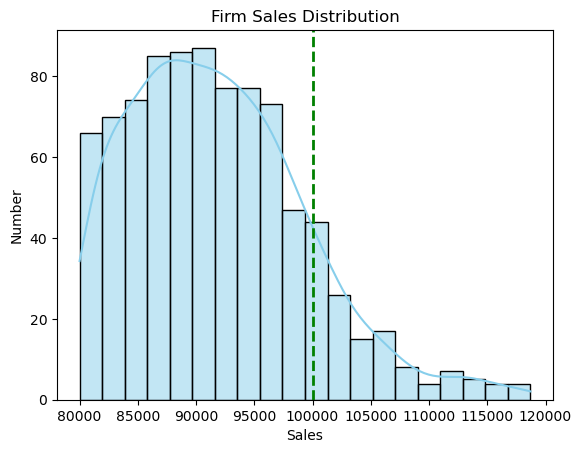

In [464]:
sns.histplot(asset_thresh.loc[(asset_thresh['매출액t'] >= 80000) & (asset_thresh['매출액t'] < 120000)].loc[(asset_thresh['3년평균매출액기준tp1'] >= 80000) & (asset_thresh['3년평균매출액기준tp1'] <= 100000),'매출액t'], color='skyblue',  bins=20, kde=True)
plt.axvline(x=100000, color='green', linestyle='--', linewidth=2)

plt.title('Firm Sales Distribution')
plt.ylabel('Number')
plt.xlabel('Sales')
plt.show()

In [465]:
asset_thresh_2 = kfs_total_2009_2019.loc[((kfs_total_2009_2019['산업분류_대t'] == "제조업(10~33)") & (kfs_total_2009_2019['자산t'] < 500000) & (kfs_total_2009_2019['기준연도'] >= 2015) ), :]

findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font family 'Nanum' not found.
findfont: Font f

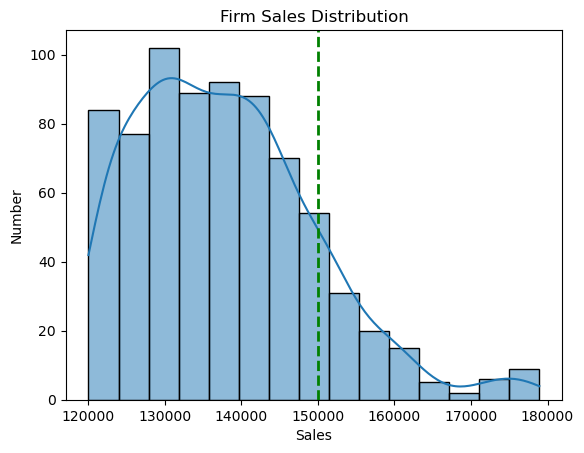

In [466]:
sns.histplot(asset_thresh_2.loc[(asset_thresh_2['매출액t'] >= 120000) & (asset_thresh_2['매출액t'] < 180000)].loc[(asset_thresh_2['3년평균매출액기준tp1'] >= 120000) & (asset_thresh_2['3년평균매출액기준tp1'] <= 150000),'매출액t'], bins=15, kde = True)

plt.axvline(x=150000, color='green', linestyle='--', linewidth=2)

plt.title('Firm Sales Distribution')
plt.ylabel('Number')
plt.xlabel('Sales')
plt.show()

### Hypothesis 1 : Employment Growth

In [119]:
len(kfs_total_2009_2019)

113676

In [120]:
kfs_total_2009_2019['산업분류_중t'].unique()

array(['식료품제조업', '도매및상품중개업', '농업', '화학물질및화학제품제조업;의약품제외', '어업',
       '비금속광물광업;연료용제외', '비금속광물제품제조업', '수상운송업', '음식점및주점업', '의료용물질및의약품제조업',
       '전문서비스업', '전자부품,컴퓨터,영상,음향및통신장비제조업', '기타전문,과학및기술서비스업', '음료제조업',
       '담배제조업', '섬유제품제조업;의복제외', '1차금속제조업', '가구제조업', '기타제품제조업',
       '폐기물수집운반,처리및원료재생업', '부동산업', '의복,의복액세서리및모피제품제조업', '소매업;자동차제외',
       '고무제품및플라스틱제품제조업', '가죽,가방및신발제조업', '금속가공제품제조업;기계및가구제외',
       '목재및나무제품제조업;가구제외', '펄프,종이및종이제품제조업', '인쇄및기록매체복제업', '출판업',
       '창고및운송관련서비스업', '코크스,연탄및석유정제품제조업', '자동차및트레일러제조업',
       '의료,정밀,광학기기및시계제조업', '연구개발업', '기타기계및장비제조업', '기타운송장비제조업', '전기장비제조업',
       '육상운송및파이프라인운송업', '전문직별공사업', '컴퓨터프로그래밍,시스템통합및관리업', '교육서비스업',
       '사업시설관리및조경서비스업', '건축기술,엔지니어링및기타과학기술서비스업', '정보서비스업',
       '전기,가스,증기및공기조절공급업', '종합건설업', '사업지원서비스업', '하수,폐수및분뇨처리업',
       '임대업;부동산제외', '자동차및부품판매업', '기타개인서비스업', '숙박업', '스포츠및오락관련서비스업',
       '항공운송업', '영상·오디오기록물제작및배급업', '수리업', '통신업', '방송업', '금융업', '보험및연금업',
       '금융및보험관련서비스업', '창작,예술및여가관련서비스업', '사회복지서비스업', '고무및플라스틱제품제조업',
       '

In [121]:
kfs_total_2009_2019['산업분류_대t'].unique()

array(['제조업(10~33)', '도매및소매업(45~47)', '농업,임업및어업(01~03)', '광업(05~08)',
       '운수업(49~52)', '숙박및음식점업(55~56)', '전문,과학및기술서비스업(70~73)',
       '하수·폐기물처리,원료재생및환경복원업(37~39)', '부동산업및임대업(68~69)',
       '출판,영상,방송통신및정보서비스업(58~63)', '건설업(41~42)', '교육서비스업(85)',
       '사업시설관리및사업지원서비스업(74~75)', '전기,가스,증기및수도사업(35~36)',
       '협회및단체,수리및기타개인서비스업(94~96)', '예술,스포츠및여가관련서비스업(90~91)',
       '금융및보험업(64~66)', '보건업및사회복지서비스업(86~87)', '정보통신업(58~63)'],
      dtype=object)

In [122]:
did_cross_data_1_2 = kfs_total_2009_2019.loc[kfs_total_2009_2019.loc[:,"산업분류_대t"] == "제조업(10~33)", :]

In [123]:
did_cross_data_1_2.loc[:,'매출액증가율tp1'] = np.log(did_cross_data_1_2.loc[:,'매출액tp1']) - np.log(did_cross_data_1_2.loc[:,'매출액t'])
did_cross_data_1_2.loc[:,'매출액증가율t'] = np.log(did_cross_data_1_2.loc[:,'매출액t']) - np.log(did_cross_data_1_2.loc[:,'매출액tm1'])
did_cross_data_1_2.loc[:,'상시근로자증가율'] = np.log(did_cross_data_1_2.loc[:,'상시근로자수tp1']) - np.log(did_cross_data_1_2.loc[:,'상시근로자수t'])

c:\Users\A\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\A\AppData\Local\Temp\ipykernel_11552\4264993110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  did_cross_data_1_2.loc[:,'매출액증가율tp1'] = np.log(did_cross_data_1_2.loc[:,'매출액tp1']) - np.log(did_cross_data_1_2.loc[:,'매출액t'])
c:\Users\A\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\A\AppData\Local\Temp\ipykernel_11552\4264993110.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [124]:
did_cross_data_1_2 = did_cross_data_1_2.loc[(np.isinf(did_cross_data_1_2.loc[:,'매출액증가율tp1']) == 0) & (did_cross_data_1_2.loc[:,'3년평균매출액기준tp1'].isna() == 0) & (np.isinf(did_cross_data_1_2.loc[:,'상시근로자증가율']) == 0),:]
did_cross_data_1_2.groupby(['기준연도']).describe()[['매출액증가율tp1', '상시근로자증가율']]

매출액증가율tp1                                                              \
         count      mean       std       min       25%       50%       75%   
기준연도                                                                         
2008    4738.0 -0.001927  0.324941 -5.212988 -0.124757  0.015667  0.138425   
2009    4590.0  0.144193  0.328732 -3.338628  0.009383  0.143954  0.294621   
2010    4715.0  0.080027  0.297895 -4.550702 -0.012355  0.093980  0.202832   
2011    4520.0  0.000668  0.309535 -6.846072 -0.088430  0.018376  0.112225   
2012    4419.0  0.004202  0.259336 -3.530519 -0.085838  0.010409  0.102571   
2013    4945.0 -0.006303  0.285323 -8.590627 -0.089946  0.012489  0.099249   
2014    5229.0 -0.015973  0.305206 -8.544225 -0.100722  0.004783  0.096811   
2015    5140.0 -0.003355  0.273597 -5.140075 -0.088401  0.009302  0.098870   
2016    5135.0  0.022037  0.266971 -3.871029 -0.071548  0.027582  0.129111   
2017    5014.0 -0.012055  0.241874 -2.943982 -0.091839  0.005711  0.093221   
2018    5180.0 -0.005199  0.251284 -2.803499 -0.097204  0.003183  0.092708   

               상시근로자증가율                                                    \
           max    count      mean       std       min       25%       50%   
기준연도                                                                        
2008  3.336352   4738.0  0.002227  0.269674 -5.326488 -0.091534  0.000000   
2009  2.157532   4590.0  0.017659  0.329695 -5.201256 -0.060625  0.028389   
2010  2.764414   4715.0  0.014195  0.268831 -4.791650 -0.069336  0.021353   
2011  3.919622   4520.0  0.015513  0.265973 -4.248495 -0.068993  0.011045   
2012  2.836444   4419.0  0.005751  0.256769 -5.393628 -0.058269  0.013072   
2013  1.808493   4945.0 -0.002531  0.251917 -4.608800 -0.070452  0.008097   
2014  1.844325   5229.0 -0.011887  0.238238 -4.078344 -0.082238  0.000000   
2015  5.407519   5140.0  0.004323  0.233455 -2.956143 -0.069324  0.000000   
2016  2.650493   5135.0 -0.018663  0.217762 -2.233592 -0.083052  0.000000   
2017  2.691575   5014.0 -0.021645  0.204329 -3.293777 -0.077428 -0.004454   
2018  1.911557   5180.0 -0.009443  0.193630 -2.434613 -0.070783 -0.005223   

                          
           75%       max  
기준연도                      
2008  0.087649  2.279770  
2009  0.134988  2.497360  
2010  0.112018  2.180964  
2011  0.103957  2.273294  
2012  0.089702  1.360586  
2013  0.081126  2.363464  
2014  0.070952  1.571106  
2015  0.081429  2.448539  
2016  0.063851  1.546802  
2017  0.052644  2.460346  
2018  0.054482  3.795489

In [125]:
print(len(did_cross_data_1_2))
print(len(did_cross_data_1_2['패널키'].unique()))

53625
7484


In [126]:
did_cross_data_1_2_panel_anal = did_cross_data_1_2.loc[(did_cross_data_1_2.loc[:,'상시근로자수t'] < 300) & (did_cross_data_1_2.loc[:,'자산t'] < 500000) & (did_cross_data_1_2.loc[:,'자본총계t'] < 100000) & (did_cross_data_1_2.loc[:,'3년평균매출액기준tp1'] < 80000),:]

In [127]:
did_cross_data_1_2_panel_anal.loc[:,'매출액증가율tp1'] = np.log(did_cross_data_1_2_panel_anal.loc[:,'매출액tp1']) - np.log(did_cross_data_1_2_panel_anal.loc[:,'매출액t'])
did_cross_data_1_2_panel_anal.loc[:,'매출액증가율t'] = np.log(did_cross_data_1_2_panel_anal.loc[:,'매출액t']) - np.log(did_cross_data_1_2_panel_anal.loc[:,'매출액tm1'])
did_cross_data_1_2_panel_anal.loc[:,'상시근로자증가율'] = np.log(did_cross_data_1_2_panel_anal.loc[:,'상시근로자수tp1']) - np.log(did_cross_data_1_2_panel_anal.loc[:,'상시근로자수t'])
did_cross_data_1_2_panel_anal.loc[:,'상시근로자기준dummy'] = (did_cross_data_1_2_panel_anal.loc[:,'상시근로자수t'] >= 270) & (did_cross_data_1_2_panel_anal.loc[:,'상시근로자수t'] < 300)
did_cross_data_1_2_panel_anal.loc[:,'ln매출액t'] = np.log(did_cross_data_1_2_panel_anal.loc[:,'매출액t'])
did_cross_data_1_2_panel_anal.loc[:,'부채비율t'] = (did_cross_data_1_2_panel_anal.loc[:,'부채t'])/(did_cross_data_1_2_panel_anal.loc[:,'자산t'])
did_cross_data_1_2_panel_anal.loc[:,'마진율t'] = (did_cross_data_1_2_panel_anal.loc[:,'법인세차감전순이익t'])/(did_cross_data_1_2_panel_anal.loc[:,'매출액t'])
did_cross_data_1_2_panel_anal.loc[:,'당좌비율t'] = (did_cross_data_1_2_panel_anal.loc[:,'당좌자산t'])/(did_cross_data_1_2_panel_anal.loc[:,'자산t'])
did_cross_data_1_2_panel_anal.loc[:,'ln상시근로자수t'] = np.log(did_cross_data_1_2_panel_anal.loc[:,'상시근로자수t'])
did_cross_data_1_2_panel_anal.loc[:,'Post'] = did_cross_data_1_2_panel_anal.loc[:,'기준연도'] >= 2014

C:\Users\A\AppData\Local\Temp\ipykernel_11552\983232708.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  did_cross_data_1_2_panel_anal.loc[:,'상시근로자기준dummy'] = (did_cross_data_1_2_panel_anal.loc[:,'상시근로자수t'] >= 270) & (did_cross_data_1_2_panel_anal.loc[:,'상시근로자수t'] < 300)
C:\Users\A\AppData\Local\Temp\ipykernel_11552\983232708.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  did_cross_data_1_2_panel_anal.loc[:,'ln매출액t'] = np.log(did_cross_data_1_2_panel_anal.loc[:,'매출액t'])
C:\Users\A\AppData\Local\Temp

In [128]:
print(len(did_cross_data_1_2_panel_anal))
print(sum(did_cross_data_1_2_panel_anal.loc[:,'상시근로자기준dummy']))

35763
524


In [129]:
did_cross_data_1_2_panel_anal = did_cross_data_1_2_panel_anal.loc[(np.isinf(did_cross_data_1_2_panel_anal.loc[:,'매출액증가율tp1']) == 0) & (did_cross_data_1_2_panel_anal.loc[:,'3년평균매출액기준tp1'].isna() == 0) & (np.isinf(did_cross_data_1_2_panel_anal.loc[:,'상시근로자증가율']) == 0) & (did_cross_data_1_2_panel_anal.loc[:,'기준연도'] >= 2008),:]

In [130]:
years = did_cross_data_1_2_panel_anal["기준연도"].unique()
for i, year in enumerate(years, 1):
    did_cross_data_1_2_panel_anal[f"yeardummy{i}"] = (did_cross_data_1_2_panel_anal["기준연도"] == year)

industries = did_cross_data_1_2_panel_anal["산업분류_중t"].unique()
for i, industry in enumerate(industries, 1):
    did_cross_data_1_2_panel_anal[f"indudummy{i}"] = (did_cross_data_1_2_panel_anal["산업분류_중t"] == industry)

In [143]:
did_cross_data_1_2_panel_anal["기준연도"] += 1

In [144]:
years

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
      dtype=int64)

In [145]:
did_cross_data_1_2_panel_anal.columns

Index(['패널키', '기준연도', '산업분류_대tm2', '산업분류_중tm2', '자본금중외국자본비율tm2', '주식시장상장형태tm2',
       '상시근로자수tm2', '종사자수_상용_합tm2', '종사자수_임시및일용근로자_합tm2', '유형자산당기취득액tm2',
       ...
       'indudummy17', 'indudummy18', 'indudummy19', 'indudummy20',
       'indudummy21', 'indudummy22', 'indudummy23', 'indudummy24',
       'indudummy25', 'indudummy26'],
      dtype='object', length=186)

In [146]:
from linearmodels import PanelOLS

did_cross_data_1_2_panel_anal_p = did_cross_data_1_2_panel_anal.set_index(['패널키', '기준연도'])

In [63]:
did_cross_data_1_2_panel_anal_p[did_cross_data_1_2_panel_anal_p['상시근로자기준dummy'] == 1].groupby(['기준연도']).describe()

자본금중외국자본비율tm2                                                   \
             count       mean        std  min  25%  50%  75%    max   
기준연도                                                                  
2008          60.0  13.533333  30.456118  0.0  0.0  0.0  0.0  100.0   
2009          40.0   6.525000  19.559230  0.0  0.0  0.0  0.0   86.0   
2010          51.0   8.764706  24.884202  0.0  0.0  0.0  0.0  100.0   
2011          38.0  14.578947  31.620752  0.0  0.0  0.0  0.0  100.0   
2012          50.0  11.100000  25.672386  0.0  0.0  0.0  0.0  100.0   
2013          47.0   6.404255  20.733988  0.0  0.0  0.0  0.0   95.0   
2014          46.0  13.652174  31.719757  0.0  0.0  0.0  0.0  100.0   
2015          46.0   6.413043  17.064031  0.0  0.0  0.0  0.0   80.0   
2016          37.0  10.783784  26.111018  0.0  0.0  0.0  0.0  100.0   
2017          49.0   3.897959  18.051137  0.0  0.0  0.0  0.0  100.0   
2018          40.0  12.525000  29.022527  0.0  0.0  0.0  0.0  100.0   

     주식시장상장형태tm2            ...     당좌비율t           ln상시근로자수t            \
           count      mean  ...       75%       max     count      mean   
기준연도                        ...                                           
2008         0.0       NaN  ...  0.424600  0.831825      60.0  5.642302   
2009         0.0       NaN  ...  0.495754  0.633503      40.0  5.656630   
2010         0.0       NaN  ...  0.457786  0.668249      51.0  5.639119   
2011         0.0       NaN  ...  0.448387  0.753362      38.0  5.653415   
2012        50.0  2.780000  ...  0.479134  0.785801      50.0  5.643523   
2013        47.0  2.617021  ...  0.436790  0.846252      47.0  5.650367   
2014        46.0  2.804348  ...  0.405151  0.862040      46.0  5.645334   
2015        46.0  2.782609  ...  0.432698  0.881034      46.0  5.649878   
2016        47.0  0.489362  ...  0.429252  0.750923      47.0  5.641482   
2017        49.0  0.510204  ...  0.356825  0.852336      49.0  5.646170   
2018        50.0  0.580000  ...  0.437323  0.855829      50.0  5.646685   

                                                                  
           std       min       25%       50%       75%       max  
기준연도                                                              
2008  0.027497  5.598422  5.626720  5.634790  5.655992  5.700444  
2009  0.029069  5.598422  5.634790  5.654240  5.678460  5.697093  
2010  0.031576  5.598422  5.613128  5.634790  5.655992  5.700444  
2011  0.033655  5.598422  5.621305  5.655986  5.686126  5.697093  
2012  0.029923  5.598422  5.617679  5.643677  5.666427  5.693732  
2013  0.033680  5.598422  5.620401  5.655992  5.681876  5.697093  
2014  0.029251  5.598422  5.627621  5.636572  5.673323  5.700444  
2015  0.028500  5.598422  5.631212  5.650732  5.672463  5.700444  
2016  0.029425  5.598422  5.614950  5.645447  5.664694  5.700444  
2017  0.031990  5.598422  5.620401  5.645447  5.669881  5.700444  
2018  0.028034  5.598422  5.622206  5.645447  5.669881  5.700444  

[11 rows x 1096 columns]

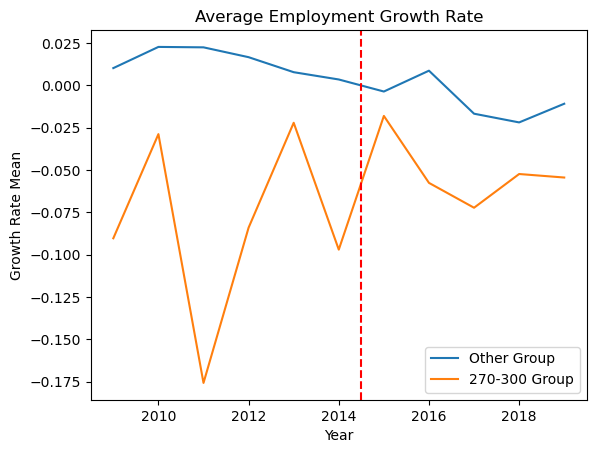

In [147]:
grouped_mean = did_cross_data_1_2_panel_anal_p.groupby(['기준연도', '상시근로자기준dummy'])['상시근로자증가율'].mean().reset_index()

dummy_0 = grouped_mean[grouped_mean['상시근로자기준dummy'] == 0]
dummy_1 = grouped_mean[grouped_mean['상시근로자기준dummy'] == 1]

# Create plot
plt.plot(grouped_mean[grouped_mean['상시근로자기준dummy'] == 0]['기준연도'], dummy_0['상시근로자증가율'], label="Other Group")
plt.plot(grouped_mean[grouped_mean['상시근로자기준dummy'] == 1]['기준연도'], dummy_1['상시근로자증가율'], label="270-300 Group")

plt.xlabel('Year')
plt.ylabel('Growth Rate Mean')
plt.axvline(x=2014.5, color='r', linestyle='--')
plt.title("Average Employment Growth Rate")
plt.legend()
plt.show()

In [135]:
induvalues = [(lambda i=i: "indudummy" + str(i))() for i in range(1, 26)]
result_indu = " + ".join(induvalues)

In [139]:
len(did_cross_data_1_2_panel_anal['패널키'].unique())

5915

In [140]:
import statsmodels.formula.api as smf

### Pooled Regression

ols_cross_3_1 = smf.ols('상시근로자증가율 ~ 1 + 상시근로자기준dummy*Post + ln상시근로자수t + 매출액증가율tp1 + 매출액증가율t + 마진율t + 당좌비율t + 부채비율t + ' + result_indu, data = did_cross_data_1_2_panel_anal_p).fit()
print(ols_cross_3_1.summary())

### unit fixed effect

did_cross_3_2 = PanelOLS.from_formula('상시근로자증가율 ~ 상시근로자기준dummy*Post + ln상시근로자수t + 매출액증가율tp1 + 매출액증가율t + 마진율t + 당좌비율t + 부채비율t + EntityEffects + ' + result_indu, data = did_cross_data_1_2_panel_anal_p, drop_absorbed=True).fit(cov_type="clustered", cluster_entity=True)
print(did_cross_3_2)

### time fixed effect

did_cross_3_4 = PanelOLS.from_formula('상시근로자증가율 ~ 상시근로자기준dummy*Post + ln상시근로자수t + 매출액증가율tp1 + 매출액증가율t + 마진율t + 당좌비율t + 부채비율t + TimeEffects + ' + result_indu, data = did_cross_data_1_2_panel_anal_p, drop_absorbed=True).fit(cov_type="clustered", cluster_time=True)
print(did_cross_3_4)

## Two-way
did_cross_3_5 = PanelOLS.from_formula('상시근로자증가율 ~ 상시근로자기준dummy*Post + ln상시근로자수t + 매출액증가율tp1 + 매출액증가율t + 마진율t + 당좌비율t + 부채비율t + TimeEffects + EntityEffects + ' + result_indu, data = did_cross_data_1_2_panel_anal_p, drop_absorbed=True).fit(cov_type="clustered", cluster_time=True, cluster_entity=True)
print(did_cross_3_5)

                            OLS Regression Results                            
Dep. Variable:               상시근로자증가율   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     122.9
Date:                Fri, 16 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:04:59   Log-Likelihood:                 3745.4
No. Observations:               35763   AIC:                            -7421.
Df Residuals:                   35728   BIC:                            -7124.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

C:\Users\A\AppData\Local\Temp\ipykernel_11552\2647863420.py:10: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

indudummy15, indudummy7

  did_cross_3_2 = PanelOLS.from_formula('상시근로자증가율 ~ 상시근로자기준dummy*Post + ln상시근로자수t + 매출액증가율tp1 + 매출액증가율t + 마진율t + 당좌비율t + 부채비율t + EntityEffects + ' + result_indu, data = did_cross_data_1_2_panel_anal_p, drop_absorbed=True).fit(cov_type="clustered", cluster_entity=True)


                          PanelOLS Estimation Summary                           
Dep. Variable:               상시근로자증가율   R-squared:                        0.2617
Estimator:                   PanelOLS   R-squared (Between):             -166.67
No. Observations:               35763   R-squared (Within):               0.2617
Date:                Fri, Feb 16 2024   R-squared (Overall):             -107.91
Time:                        17:05:00   Log-likelihood                 1.124e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      330.21
Entities:                        5915   P-value                           0.0000
Avg Obs:                       6.0462   Distribution:                F(32,29816)
Min Obs:                       1.0000                                           
Max Obs:                       11.000   F-statistic (robust):          4.177e+13
                            

C:\Users\A\AppData\Local\Temp\ipykernel_11552\2647863420.py:15: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

Post

  did_cross_3_4 = PanelOLS.from_formula('상시근로자증가율 ~ 상시근로자기준dummy*Post + ln상시근로자수t + 매출액증가율tp1 + 매출액증가율t + 마진율t + 당좌비율t + 부채비율t + TimeEffects + ' + result_indu, data = did_cross_data_1_2_panel_anal_p, drop_absorbed=True).fit(cov_type="clustered", cluster_time=True)


                          PanelOLS Estimation Summary                           
Dep. Variable:               상시근로자증가율   R-squared:                        0.1032
Estimator:                   PanelOLS   R-squared (Between):             -5.0670
No. Observations:               35763   R-squared (Within):               0.1140
Date:                Fri, Feb 16 2024   R-squared (Overall):             -3.3143
Time:                        17:05:01   Log-likelihood                    3781.1
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      124.51
Entities:                        5915   P-value                           0.0000
Avg Obs:                       6.0462   Distribution:                F(33,35719)
Min Obs:                       1.0000                                           
Max Obs:                       11.000   F-statistic (robust):          2.012e+16
                            

C:\Users\A\AppData\Local\Temp\ipykernel_11552\2647863420.py:19: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

Post, indudummy7, indudummy15

  did_cross_3_5 = PanelOLS.from_formula('상시근로자증가율 ~ 상시근로자기준dummy*Post + ln상시근로자수t + 매출액증가율tp1 + 매출액증가율t + 마진율t + 당좌비율t + 부채비율t + TimeEffects + EntityEffects + ' + result_indu, data = did_cross_data_1_2_panel_anal_p, drop_absorbed=True).fit(cov_type="clustered", cluster_time=True, cluster_entity=True)


                          PanelOLS Estimation Summary                           
Dep. Variable:               상시근로자증가율   R-squared:                        0.2588
Estimator:                   PanelOLS   R-squared (Between):             -171.12
No. Observations:               35763   R-squared (Within):               0.2612
Date:                Fri, Feb 16 2024   R-squared (Overall):             -110.79
Time:                        17:05:02   Log-likelihood                 1.133e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      335.77
Entities:                        5915   P-value                           0.0000
Avg Obs:                       6.0462   Distribution:                F(31,29807)
Min Obs:                       1.0000                                           
Max Obs:                       11.000   F-statistic (robust):             63.106
                            

c:\Users\A\anaconda3\Lib\site-packages\linearmodels\panel\results.py:88: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


- Balanced Panel

In [ ]:
did_cross_data_1_2 = kfs_total_2009_2019.loc[kfs_total_2009_2019.loc[:,"산업분류_대t"] == "제조업(10~33)", :]

In [ ]:
did_cross_data_1_2.loc[:,'매출액증가율tp1'] = np.log(did_cross_data_1_2.loc[:,'매출액tp1']) - np.log(did_cross_data_1_2.loc[:,'매출액t'])
did_cross_data_1_2.loc[:,'매출액증가율t'] = np.log(did_cross_data_1_2.loc[:,'매출액t']) - np.log(did_cross_data_1_2.loc[:,'매출액tm1'])
did_cross_data_1_2.loc[:,'상시근로자증가율'] = np.log(did_cross_data_1_2.loc[:,'상시근로자수tp1']) - np.log(did_cross_data_1_2.loc[:,'상시근로자수t'])

c:\Users\A\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\A\AppData\Local\Temp\ipykernel_11552\4264993110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  did_cross_data_1_2.loc[:,'매출액증가율tp1'] = np.log(did_cross_data_1_2.loc[:,'매출액tp1']) - np.log(did_cross_data_1_2.loc[:,'매출액t'])
c:\Users\A\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\A\AppData\Local\Temp\ipykernel_11552\4264993110.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [ ]:
print(len(did_cross_data_1_2))
print(len(did_cross_data_1_2['패널키'].unique()))

53625
7484


In [ ]:
did_cross_data_1_2_panel_anal = did_cross_data_1_2.loc[(did_cross_data_1_2.loc[:,'상시근로자수t'] < 300) & (did_cross_data_1_2.loc[:,'자산t'] < 500000) & (did_cross_data_1_2.loc[:,'자본총계t'] < 100000) & (did_cross_data_1_2.loc[:,'3년평균매출액기준tp1'] < 80000),:]

In [ ]:
did_cross_data_1_2_panel_anal.loc[:,'매출액증가율tp1'] = np.log(did_cross_data_1_2_panel_anal.loc[:,'매출액tp1']) - np.log(did_cross_data_1_2_panel_anal.loc[:,'매출액t'])
did_cross_data_1_2_panel_anal.loc[:,'매출액증가율t'] = np.log(did_cross_data_1_2_panel_anal.loc[:,'매출액t']) - np.log(did_cross_data_1_2_panel_anal.loc[:,'매출액tm1'])
did_cross_data_1_2_panel_anal.loc[:,'상시근로자증가율'] = np.log(did_cross_data_1_2_panel_anal.loc[:,'상시근로자수tp1']) - np.log(did_cross_data_1_2_panel_anal.loc[:,'상시근로자수t'])
did_cross_data_1_2_panel_anal.loc[:,'상시근로자기준dummy'] = (did_cross_data_1_2_panel_anal.loc[:,'상시근로자수t'] >= 270) & (did_cross_data_1_2_panel_anal.loc[:,'상시근로자수t'] < 300)
did_cross_data_1_2_panel_anal.loc[:,'ln매출액t'] = np.log(did_cross_data_1_2_panel_anal.loc[:,'매출액t'])
did_cross_data_1_2_panel_anal.loc[:,'부채비율t'] = (did_cross_data_1_2_panel_anal.loc[:,'부채t'])/(did_cross_data_1_2_panel_anal.loc[:,'자산t'])
did_cross_data_1_2_panel_anal.loc[:,'마진율t'] = (did_cross_data_1_2_panel_anal.loc[:,'법인세차감전순이익t'])/(did_cross_data_1_2_panel_anal.loc[:,'매출액t'])
did_cross_data_1_2_panel_anal.loc[:,'당좌비율t'] = (did_cross_data_1_2_panel_anal.loc[:,'당좌자산t'])/(did_cross_data_1_2_panel_anal.loc[:,'자산t'])
did_cross_data_1_2_panel_anal.loc[:,'ln상시근로자수t'] = np.log(did_cross_data_1_2_panel_anal.loc[:,'상시근로자수t'])
did_cross_data_1_2_panel_anal.loc[:,'Post'] = did_cross_data_1_2_panel_anal.loc[:,'기준연도'] >= 2014

C:\Users\A\AppData\Local\Temp\ipykernel_11552\983232708.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  did_cross_data_1_2_panel_anal.loc[:,'상시근로자기준dummy'] = (did_cross_data_1_2_panel_anal.loc[:,'상시근로자수t'] >= 270) & (did_cross_data_1_2_panel_anal.loc[:,'상시근로자수t'] < 300)
C:\Users\A\AppData\Local\Temp\ipykernel_11552\983232708.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  did_cross_data_1_2_panel_anal.loc[:,'ln매출액t'] = np.log(did_cross_data_1_2_panel_anal.loc[:,'매출액t'])
C:\Users\A\AppData\Local\Temp

In [ ]:
print(len(did_cross_data_1_2_panel_anal))
print(sum(did_cross_data_1_2_panel_anal.loc[:,'상시근로자기준dummy']))

35763
524


In [ ]:
did_cross_data_1_2_panel_anal = did_cross_data_1_2_panel_anal.loc[(np.isinf(did_cross_data_1_2_panel_anal.loc[:,'매출액증가율tp1']) == 0) & (did_cross_data_1_2_panel_anal.loc[:,'3년평균매출액기준tp1'].isna() == 0) & (np.isinf(did_cross_data_1_2_panel_anal.loc[:,'상시근로자증가율']) == 0) & (did_cross_data_1_2_panel_anal.loc[:,'기준연도'] >= 2008),:]

In [ ]:
years = did_cross_data_1_2_panel_anal["기준연도"].unique()
for i, year in enumerate(years, 1):
    did_cross_data_1_2_panel_anal[f"yeardummy{i}"] = (did_cross_data_1_2_panel_anal["기준연도"] == year)

industries = did_cross_data_1_2_panel_anal["산업분류_중t"].unique()
for i, industry in enumerate(industries, 1):
    did_cross_data_1_2_panel_anal[f"indudummy{i}"] = (did_cross_data_1_2_panel_anal["산업분류_중t"] == industry)

In [ ]:
did_cross_data_1_2_panel_anal["기준연도"] += 1

In [ ]:
years

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
      dtype=int64)

In [ ]:
did_cross_data_1_2_panel_anal.columns

Index(['패널키', '기준연도', '산업분류_대tm2', '산업분류_중tm2', '자본금중외국자본비율tm2', '주식시장상장형태tm2',
       '상시근로자수tm2', '종사자수_상용_합tm2', '종사자수_임시및일용근로자_합tm2', '유형자산당기취득액tm2',
       ...
       'indudummy17', 'indudummy18', 'indudummy19', 'indudummy20',
       'indudummy21', 'indudummy22', 'indudummy23', 'indudummy24',
       'indudummy25', 'indudummy26'],
      dtype='object', length=186)

In [ ]:
from linearmodels import PanelOLS

did_cross_data_1_2_panel_anal_p = did_cross_data_1_2_panel_anal.set_index(['패널키', '기준연도'])

In [ ]:
did_cross_data_1_2_panel_anal_p[did_cross_data_1_2_panel_anal_p['상시근로자기준dummy'] == 1].groupby(['기준연도']).describe()

자본금중외국자본비율tm2                                                   \
             count       mean        std  min  25%  50%  75%    max   
기준연도                                                                  
2008          60.0  13.533333  30.456118  0.0  0.0  0.0  0.0  100.0   
2009          40.0   6.525000  19.559230  0.0  0.0  0.0  0.0   86.0   
2010          51.0   8.764706  24.884202  0.0  0.0  0.0  0.0  100.0   
2011          38.0  14.578947  31.620752  0.0  0.0  0.0  0.0  100.0   
2012          50.0  11.100000  25.672386  0.0  0.0  0.0  0.0  100.0   
2013          47.0   6.404255  20.733988  0.0  0.0  0.0  0.0   95.0   
2014          46.0  13.652174  31.719757  0.0  0.0  0.0  0.0  100.0   
2015          46.0   6.413043  17.064031  0.0  0.0  0.0  0.0   80.0   
2016          37.0  10.783784  26.111018  0.0  0.0  0.0  0.0  100.0   
2017          49.0   3.897959  18.051137  0.0  0.0  0.0  0.0  100.0   
2018          40.0  12.525000  29.022527  0.0  0.0  0.0  0.0  100.0   

     주식시장상장형태tm2            ...     당좌비율t           ln상시근로자수t            \
           count      mean  ...       75%       max     count      mean   
기준연도                        ...                                           
2008         0.0       NaN  ...  0.424600  0.831825      60.0  5.642302   
2009         0.0       NaN  ...  0.495754  0.633503      40.0  5.656630   
2010         0.0       NaN  ...  0.457786  0.668249      51.0  5.639119   
2011         0.0       NaN  ...  0.448387  0.753362      38.0  5.653415   
2012        50.0  2.780000  ...  0.479134  0.785801      50.0  5.643523   
2013        47.0  2.617021  ...  0.436790  0.846252      47.0  5.650367   
2014        46.0  2.804348  ...  0.405151  0.862040      46.0  5.645334   
2015        46.0  2.782609  ...  0.432698  0.881034      46.0  5.649878   
2016        47.0  0.489362  ...  0.429252  0.750923      47.0  5.641482   
2017        49.0  0.510204  ...  0.356825  0.852336      49.0  5.646170   
2018        50.0  0.580000  ...  0.437323  0.855829      50.0  5.646685   

                                                                  
           std       min       25%       50%       75%       max  
기준연도                                                              
2008  0.027497  5.598422  5.626720  5.634790  5.655992  5.700444  
2009  0.029069  5.598422  5.634790  5.654240  5.678460  5.697093  
2010  0.031576  5.598422  5.613128  5.634790  5.655992  5.700444  
2011  0.033655  5.598422  5.621305  5.655986  5.686126  5.697093  
2012  0.029923  5.598422  5.617679  5.643677  5.666427  5.693732  
2013  0.033680  5.598422  5.620401  5.655992  5.681876  5.697093  
2014  0.029251  5.598422  5.627621  5.636572  5.673323  5.700444  
2015  0.028500  5.598422  5.631212  5.650732  5.672463  5.700444  
2016  0.029425  5.598422  5.614950  5.645447  5.664694  5.700444  
2017  0.031990  5.598422  5.620401  5.645447  5.669881  5.700444  
2018  0.028034  5.598422  5.622206  5.645447  5.669881  5.700444  

[11 rows x 1096 columns]

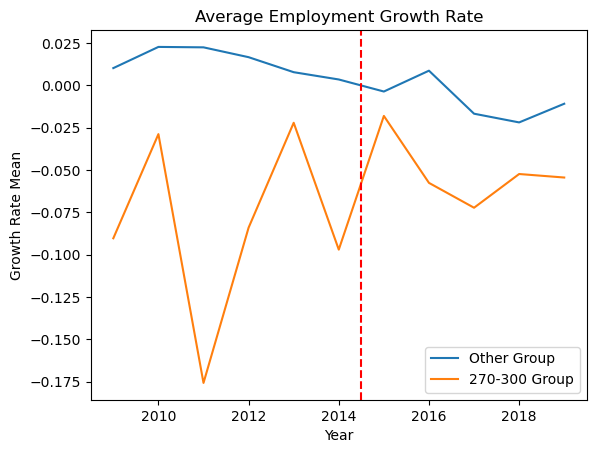

In [ ]:
grouped_mean = did_cross_data_1_2_panel_anal_p.groupby(['기준연도', '상시근로자기준dummy'])['상시근로자증가율'].mean().reset_index()

dummy_0 = grouped_mean[grouped_mean['상시근로자기준dummy'] == 0]
dummy_1 = grouped_mean[grouped_mean['상시근로자기준dummy'] == 1]

# Create plot
plt.plot(grouped_mean[grouped_mean['상시근로자기준dummy'] == 0]['기준연도'], dummy_0['상시근로자증가율'], label="Other Group")
plt.plot(grouped_mean[grouped_mean['상시근로자기준dummy'] == 1]['기준연도'], dummy_1['상시근로자증가율'], label="270-300 Group")

plt.xlabel('Year')
plt.ylabel('Growth Rate Mean')
plt.axvline(x=2014.5, color='r', linestyle='--')
plt.title("Average Employment Growth Rate")
plt.legend()
plt.show()

In [ ]:
induvalues = [(lambda i=i: "indudummy" + str(i))() for i in range(1, 26)]
result_indu = " + ".join(induvalues)

In [ ]:
len(did_cross_data_1_2_panel_anal['패널키'].unique())

5915

In [ ]:
import statsmodels.formula.api as smf

### Pooled Regression

ols_cross_3_1 = smf.ols('상시근로자증가율 ~ 1 + 상시근로자기준dummy*Post + ln상시근로자수t + 매출액증가율tp1 + 매출액증가율t + 마진율t + 당좌비율t + 부채비율t + ' + result_indu, data = did_cross_data_1_2_panel_anal_p).fit()
print(ols_cross_3_1.summary())

### unit fixed effect

did_cross_3_2 = PanelOLS.from_formula('상시근로자증가율 ~ 상시근로자기준dummy*Post + ln상시근로자수t + 매출액증가율tp1 + 매출액증가율t + 마진율t + 당좌비율t + 부채비율t + EntityEffects + ' + result_indu, data = did_cross_data_1_2_panel_anal_p, drop_absorbed=True).fit(cov_type="clustered", cluster_entity=True)
print(did_cross_3_2)

### time fixed effect

did_cross_3_4 = PanelOLS.from_formula('상시근로자증가율 ~ 상시근로자기준dummy*Post + ln상시근로자수t + 매출액증가율tp1 + 매출액증가율t + 마진율t + 당좌비율t + 부채비율t + TimeEffects + ' + result_indu, data = did_cross_data_1_2_panel_anal_p, drop_absorbed=True).fit(cov_type="clustered", cluster_time=True)
print(did_cross_3_4)

## Two-way
did_cross_3_5 = PanelOLS.from_formula('상시근로자증가율 ~ 상시근로자기준dummy*Post + ln상시근로자수t + 매출액증가율tp1 + 매출액증가율t + 마진율t + 당좌비율t + 부채비율t + TimeEffects + EntityEffects + ' + result_indu, data = did_cross_data_1_2_panel_anal_p, drop_absorbed=True).fit(cov_type="clustered", cluster_time=True, cluster_entity=True)
print(did_cross_3_5)

                            OLS Regression Results                            
Dep. Variable:               상시근로자증가율   R-squared:                       0.105
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     122.9
Date:                Fri, 16 Feb 2024   Prob (F-statistic):               0.00
Time:                        17:04:59   Log-Likelihood:                 3745.4
No. Observations:               35763   AIC:                            -7421.
Df Residuals:                   35728   BIC:                            -7124.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

C:\Users\A\AppData\Local\Temp\ipykernel_11552\2647863420.py:10: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

indudummy15, indudummy7

  did_cross_3_2 = PanelOLS.from_formula('상시근로자증가율 ~ 상시근로자기준dummy*Post + ln상시근로자수t + 매출액증가율tp1 + 매출액증가율t + 마진율t + 당좌비율t + 부채비율t + EntityEffects + ' + result_indu, data = did_cross_data_1_2_panel_anal_p, drop_absorbed=True).fit(cov_type="clustered", cluster_entity=True)


                          PanelOLS Estimation Summary                           
Dep. Variable:               상시근로자증가율   R-squared:                        0.2617
Estimator:                   PanelOLS   R-squared (Between):             -166.67
No. Observations:               35763   R-squared (Within):               0.2617
Date:                Fri, Feb 16 2024   R-squared (Overall):             -107.91
Time:                        17:05:00   Log-likelihood                 1.124e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      330.21
Entities:                        5915   P-value                           0.0000
Avg Obs:                       6.0462   Distribution:                F(32,29816)
Min Obs:                       1.0000                                           
Max Obs:                       11.000   F-statistic (robust):          4.177e+13
                            

C:\Users\A\AppData\Local\Temp\ipykernel_11552\2647863420.py:15: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

Post

  did_cross_3_4 = PanelOLS.from_formula('상시근로자증가율 ~ 상시근로자기준dummy*Post + ln상시근로자수t + 매출액증가율tp1 + 매출액증가율t + 마진율t + 당좌비율t + 부채비율t + TimeEffects + ' + result_indu, data = did_cross_data_1_2_panel_anal_p, drop_absorbed=True).fit(cov_type="clustered", cluster_time=True)


                          PanelOLS Estimation Summary                           
Dep. Variable:               상시근로자증가율   R-squared:                        0.1032
Estimator:                   PanelOLS   R-squared (Between):             -5.0670
No. Observations:               35763   R-squared (Within):               0.1140
Date:                Fri, Feb 16 2024   R-squared (Overall):             -3.3143
Time:                        17:05:01   Log-likelihood                    3781.1
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      124.51
Entities:                        5915   P-value                           0.0000
Avg Obs:                       6.0462   Distribution:                F(33,35719)
Min Obs:                       1.0000                                           
Max Obs:                       11.000   F-statistic (robust):          2.012e+16
                            

C:\Users\A\AppData\Local\Temp\ipykernel_11552\2647863420.py:19: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

Post, indudummy7, indudummy15

  did_cross_3_5 = PanelOLS.from_formula('상시근로자증가율 ~ 상시근로자기준dummy*Post + ln상시근로자수t + 매출액증가율tp1 + 매출액증가율t + 마진율t + 당좌비율t + 부채비율t + TimeEffects + EntityEffects + ' + result_indu, data = did_cross_data_1_2_panel_anal_p, drop_absorbed=True).fit(cov_type="clustered", cluster_time=True, cluster_entity=True)


                          PanelOLS Estimation Summary                           
Dep. Variable:               상시근로자증가율   R-squared:                        0.2588
Estimator:                   PanelOLS   R-squared (Between):             -171.12
No. Observations:               35763   R-squared (Within):               0.2612
Date:                Fri, Feb 16 2024   R-squared (Overall):             -110.79
Time:                        17:05:02   Log-likelihood                 1.133e+04
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      335.77
Entities:                        5915   P-value                           0.0000
Avg Obs:                       6.0462   Distribution:                F(31,29807)
Min Obs:                       1.0000                                           
Max Obs:                       11.000   F-statistic (robust):             63.106
                            

c:\Users\A\anaconda3\Lib\site-packages\linearmodels\panel\results.py:88: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


### Hypothesis 2 : DD and Sales Growth

In [5]:
kfs_did_data_2010.columns

Index(['패널키', '기준연도2009', '산업분류_대2009', '산업분류_중2009', '자본금중외국자본비율2009',
       '주식시장상장형태2009', '상시근로자수2009', '종사자수_상용_합2009', '종사자수_임시및일용근로자_합2009',
       '유형자산당기취득액2009',
       ...
       'ROA2010', 'ROA2011', 'ROA2012', 'ROA2013', 'ROA2014', 'ROA2015',
       'ROA2016', 'ROA2017', 'ROA2018', 'ROA2019'],
      dtype='object', length=437)

In [64]:
kfs_panel_data_2010.columns

Index(['패널키', '기준연도', '산업분류_대', '산업분류_중', '자본금중외국자본비율', '주식시장상장형태', '상시근로자수',
       '종사자수_상용_합', '종사자수_임시및일용근로자_합', '유형자산당기취득액', '무형자산당기취득액', '특허권_보유건수',
       '실용신안권_보유건수', '디자인권_보유건수', '상표권_보유건수', '자회사·관련회사_보유유무', '모회사_유무',
       '기업간전략적제휴여부', '자본금', '자산', '당좌자산', '재고자산', '유형자산', '무형자산', '부채', '유동부채',
       '비유동부채', '자본총계', '매출액', '영업외비용', '법인세차감전순이익', '감가상각비', '세금과공과', '광고선전비',
       '대손상각비', '이자비용', 'ROA', '부채비율', '마진율', '당좌비율', '매출액증가율', '자산증가율',
       '상시근로자증가율', 'Post', '상시근로자수증가율', '매출액증가율t1', '상시근로자증가율t1'],
      dtype='object')

In [7]:
(kfs_did_data_2010['산업분류_대2014']).unique()

array(['제조업(10~33)', '도매및소매업(45~47)', '전문,과학및기술서비스업(70~73)', '건설업(41~42)',
       '예술,스포츠및여가관련서비스업(90~91)', '숙박및음식점업(55~56)',
       '사업시설관리및사업지원서비스업(74~75)', '운수업(49~52)', '금융및보험업(64~66)',
       '출판,영상,방송통신및정보서비스업(58~63)', '부동산업및임대업(68~69)',
       '하수·폐기물처리,원료재생및환경복원업(37~39)', '교육서비스업(85)',
       '협회및단체,수리및기타개인서비스업(94~96)', '농업,임업및어업(01~03)',
       '전기,가스,증기및수도사업(35~36)', '보건업및사회복지서비스업(86~87)'], dtype=object)

In [8]:
(kfs_did_data_2010['산업분류_중2014']).unique()

array(['전자부품,컴퓨터,영상,음향및통신장비제조업', '화학물질및화학제품제조업;의약품제외', '도매및상품중개업',
       '건축기술,엔지니어링및기타과학기술서비스업', '식료품제조업', '1차금속제조업', '종합건설업',
       '스포츠및오락관련서비스업', '비금속광물제품제조업', '숙박업', '고무제품및플라스틱제품제조업',
       '사업시설관리및조경서비스업', '창고및운송관련서비스업', '육상운송및파이프라인운송업', '자동차및트레일러제조업',
       '금융업', '음식점및주점업', '소매업;자동차제외', '의료용물질및의약품제조업', '전기장비제조업',
       '자동차및부품판매업', '출판업', '사업지원서비스업', '전문직별공사업', '금속가공제품제조업;기계및가구제외',
       '기타제품제조업', '방송업', '전문서비스업', '기타기계및장비제조업', '의복,의복액세서리및모피제품제조업',
       '컴퓨터프로그래밍,시스템통합및관리업', '부동산업', '펄프,종이및종이제품제조업', '의료,정밀,광학기기및시계제조업',
       '기타전문,과학및기술서비스업', '연구개발업', '가죽,가방및신발제조업', '가구제조업', '인쇄및기록매체복제업',
       '섬유제품제조업;의복제외', '임대업;부동산제외', '보험및연금업', '금융및보험관련서비스업',
       '폐기물수집운반,처리및원료재생업', '교육서비스업', '수상운송업', '창작,예술및여가관련서비스업', '통신업',
       '음료제조업', '영상·오디오기록물제작및배급업', '수리업', '정보서비스업', '기타운송장비제조업', '어업',
       '항공운송업', '코크스,연탄및석유정제품제조업', '전기,가스,증기및공기조절공급업', '기타개인서비스업',
       '목재및나무제품제조업;가구제외', '하수,폐수및분뇨처리업', '사회복지서비스업'], dtype=object)

In [99]:
did_test_key = kfs_did_data_2010.loc[(kfs_did_data_2010['산업분류_대2014'] == "제조업(10~33)")
                                     & (kfs_did_data_2010['산업분류_중2014'] != "음료제조업") &
                                     (kfs_did_data_2010['산업분류_중2014'] != "의료용물질및의약품제조업") &
                                     (kfs_did_data_2010['산업분류_중2014'] != "비금속광물제품제조업") &
                                     (kfs_did_data_2010['산업분류_중2014'] != "의료,정밀,광학기기및시계제조업") & 
                                     (kfs_did_data_2010['산업분류_중2014'] != "기타제품제조업")
                                     , :]

In [100]:
did_test_key_panel_anal = did_test_key.loc[((did_test_key.loc[:,'상시근로자수2014'] < 300) | (did_test_key.loc[:,'자본금2014'] < 8000)) & (did_test_key.loc[:,'자산2014'] < 500000) & (did_test_key.loc[:,'자본총계2014'] < 100000) & (did_test_key.loc[:,'3년평균매출액2015기준'] < 100000) & (did_test_key.loc[:,'상시근로자수2014'] < 1000),:]
did_test_key_panel_anal = did_test_key_panel_anal.loc[((did_test_key_panel_anal.loc[:,'상시근로자수2013'] < 300) | (did_test_key_panel_anal.loc[:,'자본금2013'] < 8000)) & (did_test_key_panel_anal.loc[:,'자산2013'] < 500000) & (did_test_key_panel_anal.loc[:,'자본총계2013'] < 100000) & (did_test_key_panel_anal.loc[:,'3년평균매출액2014기준'] < 100000) & (did_test_key_panel_anal.loc[:,'상시근로자수2013'] < 1000),:]
did_test_key_panel_anal = did_test_key_panel_anal.loc[((did_test_key_panel_anal.loc[:,'상시근로자수2012'] < 300) | (did_test_key_panel_anal.loc[:,'자본금2012'] < 8000)) & (did_test_key_panel_anal.loc[:,'자산2012'] < 500000) & (did_test_key_panel_anal.loc[:,'자본총계2012'] < 100000) & (did_test_key_panel_anal.loc[:,'3년평균매출액2013기준'] < 100000) & (did_test_key_panel_anal.loc[:,'상시근로자수2012'] < 1000),:]
did_test_key_panel_anal = did_test_key_panel_anal.loc[((did_test_key_panel_anal.loc[:,'상시근로자수2011'] < 300) | (did_test_key_panel_anal.loc[:,'자본금2011'] < 8000)) & (did_test_key_panel_anal.loc[:,'자산2011'] < 500000) & (did_test_key_panel_anal.loc[:,'자본총계2011'] < 100000) & (did_test_key_panel_anal.loc[:,'3년평균매출액2012기준'] < 100000) & (did_test_key_panel_anal.loc[:,'상시근로자수2011'] < 1000),:]

In [102]:
len(did_test_key_panel_anal)

1824

In [101]:
did_test_key_panel_anal.loc[:, 'treat'] = ((did_test_key_panel_anal['산업분류_중2014'] == "식료품제조업") |
                                           (did_test_key_panel_anal['산업분류_중2014'] == "섬유제품제조업;의복제외") |
                                           (did_test_key_panel_anal['산업분류_중2014'] == "목재및나무제품제조업;가구제외") |
                                           (did_test_key_panel_anal['산업분류_중2014'] == "코크스,연탄및석유정제품제조업") |
                                           (did_test_key_panel_anal['산업분류_중2014'] == "화학물질및화학제품제조업;의약품제외") |
                                           (did_test_key_panel_anal['산업분류_중2014'] == "고무제품및플라스틱제품제조업") |
                                           (did_test_key_panel_anal['산업분류_중2014'] == "금속가공제품제조업;기계및가구제외") |
                                           (did_test_key_panel_anal['산업분류_중2014'] == "전자부품,컴퓨터,영상,음향및통신장비제조업") |
                                           (did_test_key_panel_anal['산업분류_중2014'] == "기타기계및장비제조업") |
                                           (did_test_key_panel_anal['산업분류_중2014'] == "자동차및트레일러제조업") |
                                           (did_test_key_panel_anal['산업분류_중2014'] == "기타운송장비제조업") | 
                                           (did_test_key_panel_anal['산업분류_중2014'] == "담배제조업"))

In [103]:
kfs_panel_anal_did_2010 = kfs_panel_data_2010.loc[kfs_panel_data_2010.loc[:,'패널키'].isin(did_test_key_panel_anal['패널키']),:]
kfs_panel_anal_did_2010_data = pd.merge(kfs_panel_anal_did_2010, did_test_key_panel_anal[['패널키','treat']], on = '패널키')

In [104]:
kfs_panel_anal_did_2010_data = kfs_panel_anal_did_2010_data.loc[(kfs_panel_anal_did_2010_data.loc[:,"기준연도"] >= 2012) & (kfs_panel_anal_did_2010_data.loc[:,"기준연도"] < 2020), :]
print(sum(kfs_panel_anal_did_2010_data['treat']))
print(len(kfs_panel_anal_did_2010_data))
# print(sum(kfs_panel_anal_did_2010_data['매출액dummy']))
# print(sum((kfs_panel_anal_did_2010_data['매출액dummy'] == 1) & (kfs_panel_anal_did_2010_data['treat'] == 1)))

11752
14592


In [112]:
kfs_panel_anal_did_2010_data['ln상시근로자수'] = kfs_panel_anal_did_2010_data['상시근로자수']
kfs_panel_anal_did_2010_data['ln매출액'] = kfs_panel_anal_did_2010_data['매출액']
kfs_panel_anal_did_2010_data['ln자산'] = kfs_panel_anal_did_2010_data['자산']

In [113]:
years = kfs_panel_anal_did_2010_data["기준연도"].unique()
for i, year in enumerate(years, 1):
    kfs_panel_anal_did_2010_data[f"yeardummy{i}"] = (kfs_panel_anal_did_2010_data["기준연도"] == year)

In [108]:
years

array([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

In [114]:
kfs_panel_anal_did_2010_data.columns

Index(['패널키', '기준연도', '산업분류_대', '산업분류_중', '자본금중외국자본비율', '주식시장상장형태', '상시근로자수',
       '종사자수_상용_합', '종사자수_임시및일용근로자_합', '유형자산당기취득액', '무형자산당기취득액', '특허권_보유건수',
       '실용신안권_보유건수', '디자인권_보유건수', '상표권_보유건수', '자회사·관련회사_보유유무', '모회사_유무',
       '기업간전략적제휴여부', '자본금', '자산', '당좌자산', '재고자산', '유형자산', '무형자산', '부채', '유동부채',
       '비유동부채', '자본총계', '매출액', '영업외비용', '법인세차감전순이익', '감가상각비', '세금과공과', '광고선전비',
       '대손상각비', '이자비용', 'ROA', '부채비율', '마진율', '당좌비율', '매출액증가율', '자산증가율',
       '상시근로자증가율', 'Post', '상시근로자수증가율', '매출액증가율t1', '상시근로자증가율t1', 'treat',
       'ln상시근로자수', 'ln매출액', 'yeardummy1', 'yeardummy2', 'yeardummy3',
       'yeardummy4', 'yeardummy5', 'yeardummy6', 'yeardummy7', 'yeardummy8',
       'ln자산'],
      dtype='object')

In [115]:
from linearmodels import PanelOLS
import statsmodels.formula.api as smf

kfs_panel_anal_did_2010_data_p = kfs_panel_anal_did_2010_data.set_index(['패널키', '기준연도'])

In [118]:
ddd_1 = smf.ols('매출액증가율 ~ treat*Post + ln매출액 + 마진율 + 부채비율', data = kfs_panel_anal_did_2010_data_p, drop_absorbed=True).fit()
print(ddd_1.summary())

ddd_2 = PanelOLS.from_formula('매출액증가율 ~ treat*Post + ln매출액 + 마진율 + 부채비율 + EntityEffects', data = kfs_panel_anal_did_2010_data_p, drop_absorbed=True).fit(cov_type="clustered", cluster_entity=True)
print(ddd_2)

ddd_3 = PanelOLS.from_formula('매출액증가율 ~ treat*Post + ln매출액 + 마진율 + 부채비율 + TimeEffects', data = kfs_panel_anal_did_2010_data_p, drop_absorbed=True).fit(cov_type="clustered", cluster_time=True)
print(ddd_3)

ddd_4 = PanelOLS.from_formula('매출액증가율 ~ treat*Post + ln매출액 + 마진율 + 부채비율 + EntityEffects + TimeEffects', data = kfs_panel_anal_did_2010_data_p, drop_absorbed=True).fit(cov_type="clustered", cluster_time=True, cluster_entity=True)
print(ddd_4)

c:\Users\A\anaconda3\Lib\site-packages\statsmodels\base\model.py:130: ValueWarning: unknown kwargs ['drop_absorbed']
  warnings.warn(msg, ValueWarning)
C:\Users\A\AppData\Local\Temp\ipykernel_11552\2693743997.py:4: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

treat

  ddd_2 = PanelOLS.from_formula('매출액증가율 ~ treat*Post + ln매출액 + 마진율 + 부채비율 + EntityEffects', data = kfs_panel_anal_did_2010_data_p, drop_absorbed=True).fit(cov_type="clustered", cluster_entity=True)


                            OLS Regression Results                            
Dep. Variable:                 매출액증가율   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     276.1
Date:                Fri, 16 Feb 2024   Prob (F-statistic):               0.00
Time:                        16:45:29   Log-Likelihood:                 2317.0
No. Observations:               14592   AIC:                            -4620.
Df Residuals:                   14585   BIC:                            -4567.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

C:\Users\A\AppData\Local\Temp\ipykernel_11552\2693743997.py:7: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

Post

  ddd_3 = PanelOLS.from_formula('매출액증가율 ~ treat*Post + ln매출액 + 마진율 + 부채비율 + TimeEffects', data = kfs_panel_anal_did_2010_data_p, drop_absorbed=True).fit(cov_type="clustered", cluster_time=True)
C:\Users\A\AppData\Local\Temp\ipykernel_11552\2693743997.py:10: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

treat, Post

  ddd_4 = PanelOLS.from_formula('매출액증가율 ~ treat*Post + ln매출액 + 마진율 + 부채비율 + EntityEffects + TimeEffects', data = kfs_panel_anal_did_2010_data_p, drop_absorbed=True).fit(cov_type="clustered", cluster_time=True, cluster_entity=True)


                          PanelOLS Estimation Summary                           
Dep. Variable:                 매출액증가율   R-squared:                        0.0997
Estimator:                   PanelOLS   R-squared (Between):             -2.3642
No. Observations:               14592   R-squared (Within):               0.1120
Date:                Fri, Feb 16 2024   R-squared (Overall):             -0.1281
Time:                        16:45:29   Log-likelihood                    2395.4
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      322.76
Entities:                        1824   P-value                           0.0000
Avg Obs:                       8.0000   Distribution:                 F(5,14579)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             72.544
                            

In [153]:
ddd_year = PanelOLS.from_formula('매출액증가율 ~ treat*yeardummy1 + treat*yeardummy2 + treat*yeardummy4 +  treat*yeardummy5 + treat*yeardummy6 + treat*yeardummy7 + treat*yeardummy8', data = kfs_panel_anal_did_2010_data_p, drop_absorbed=True).fit(cov_type="clustered", cluster_entity=True)
print(ddd_year)

# did_test_2 = PanelOLS.from_formula('매출액증가율 ~ treat*yeardummy1 + treat*yeardummy2 + treat*yeardummy3 +  treat*yeardummy5 + treat*yeardummy6 + treat*yeardummy7 + treat*yeardummy8 + ln매출액 + 마진율 + 부채비율', data = kfs_panel_anal_did_2010_data_p).fit()
# print(did_test_2)

                          PanelOLS Estimation Summary                           
Dep. Variable:                 매출액증가율   R-squared:                        0.0142
Estimator:                   PanelOLS   R-squared (Between):              0.0067
No. Observations:               14592   R-squared (Within):               0.0150
Date:                Sun, Feb 18 2024   R-squared (Overall):              0.0142
Time:                        15:27:16   Log-likelihood                    1632.3
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      14.008
Entities:                        1824   P-value                           0.0000
Avg Obs:                       8.0000   Distribution:                F(15,14577)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):            -21.185
                            

c:\Users\A\anaconda3\Lib\site-packages\linearmodels\panel\results.py:88: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


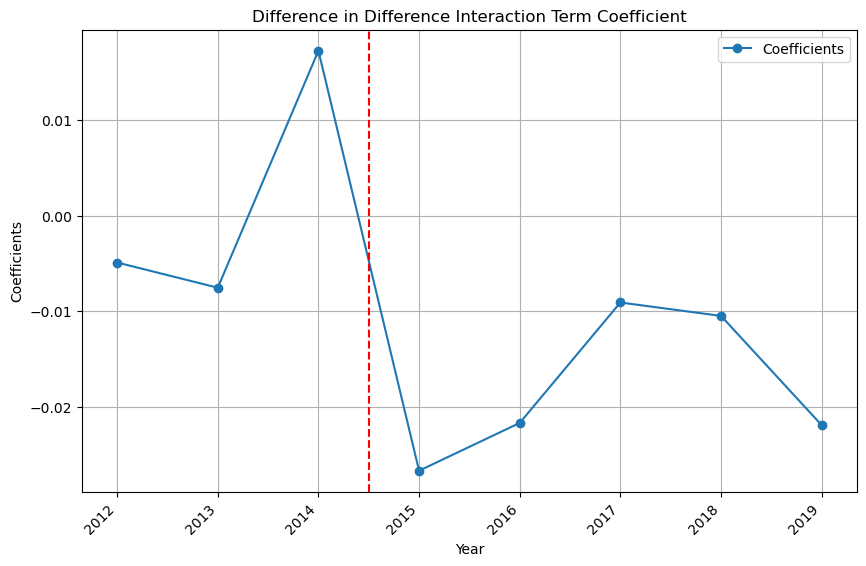

In [152]:
import matplotlib.pyplot as plt
import numpy as np

coefficients = ddd_year.params.iloc[[8,9,0,10,11,12,13,14]]
conf_int = ddd_year.conf_int().iloc[[8,9,0,10,11,12,13,14]]
variables = [2012,2013,2014,2015,2016,2017,2018,2019]

plt.figure(figsize=(10, 6))

plt.plot(coefficients, marker='o', label='Coefficients')

plt.xticks(np.arange(len(variables)), variables, rotation=45, ha='right')
plt.axvline(x=2.5, color='r', linestyle='--')
plt.title('Difference in Difference Interaction Term Coefficient')
plt.ylabel('Coefficients')
plt.xlabel('Year')
plt.legend()
plt.grid(True)
plt.show()


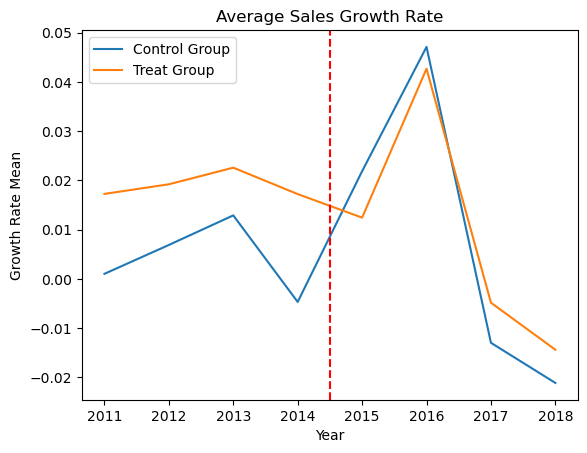

In [86]:
grouped_mean = kfs_panel_anal_did_2010_data_p.groupby(['기준연도', 'treat'])['매출액증가율'].mean().reset_index()

dummy_0 = grouped_mean[grouped_mean['treat'] == 0]
dummy_1 = grouped_mean[grouped_mean['treat'] == 1]

plt.plot(grouped_mean[grouped_mean['treat'] == 0]['기준연도'], dummy_0['매출액증가율'], label="Control Group")
plt.plot(grouped_mean[grouped_mean['treat'] == 1]['기준연도'], dummy_1['매출액증가율'], label="Treat Group")
plt.xlabel('Year')
plt.ylabel('Growth Rate Mean')
plt.axvline(x=2014.5, color='r', linestyle='--')
plt.title("Average Sales Growth Rate")
plt.legend()
plt.show()